## Case Study "Cars4U Project" : Factors Influencing Price of Used Cars using Linear Regression

## Context: 
    
- There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.
- There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. 
- Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply.
- In this case study, we have come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

## Problem:

**key questions:**

- What are the factors present in dataset, contribute in the price of used cars.
- Does car brand matter in the used cars market?
- In which places (Locations) used cars are sold more?
- How Fuel type, Transmission, Power, number of seats matter in determining the price of used cars?
- How ownership affects the sale of used cars? Do certain level of ownerships are preferred in used
  cars market?
- How does Year of Manufacture affect the used car price?
- What is the correlation between each column?

## Attribute Information:
 

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit from the number of displayed columns and rows, so we can see the entire dataframe when printed.
pd.set_option('display.max_columns', None)
from matplotlib.pyplot import figure

In [2]:
#Imports for Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Import for Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load and explore data

In [3]:
#Import "used_cars_data" dataset
df = pd.read_csv("used_cars_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 7253 rows and 14 columns.


In [4]:
#Print the first 10 rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Observations:

- There are 14 columns and 7253 rows.
- S.No. column is like index, we can drop this column later.
- MIleage column has units -kmpl and km/kg
- Engine column has unit CC
- Power column has unit bhp
- New_Price column has units Lakh and Cr.
- Name column has car brand name as well as model, we will need to extract these from the column
  later.

In [5]:
#Check Datatypes of the columns and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Observations:

- Once we remove units from Mileage, Engine, Power, New_Price, these columns can be converted into float datatype.

- Columns Mileage, Engine, Power, Seats, New_Price and Price contain null values.


### Let's remove the units from the columns.

### Remove units from Mileage

In [6]:
#Now lets take care of the units of Milege column

#This function lists the columns that have mileage units (km/kg or kmpl)
milege_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns with unit
    if (df[colname].str.endswith('km/kg').any() or df[colname].str.endswith('kmpl').any()):  # using `.str` so we can use an element-wise string method
        milege_cols.append(colname)
print(milege_cols)  

['Mileage']


In [7]:
#Since km/kg=kmpl (1 litre=1 kilogram) we can just remove the unit as everything in same unit, no need of conversion.
def mileage_to_num(mileage_val):
    if isinstance(mileage_val, str):
        return (mileage_val.replace('kmpl', '').replace('km/kg', '').replace(' km/kg', '').replace(' kmpl', ''))
    else:
        return np.nan

for colname in milege_cols:
    df[colname] = df[colname].apply(mileage_to_num)

### Remove units from Power

In [8]:
#Now lets take care of the units of Power column
#This function lists the columns that have power units (bhp)

power_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns with unit
    if df[colname].str.endswith('bhp').any():  # using `.str` so we can use an element-wise string method
        power_cols.append(colname)
print(power_cols)  

['Power']


In [9]:
#We can just remove the unit (bhp), since there is no other unit, no need of conversion.
def power_to_num(power_val):
    if isinstance(power_val, str):
        return (power_val.replace('bhp', ''))
    else:
        return np.nan

for colname in power_cols:
    df[colname] = df[colname].apply(power_to_num)

### Remove units from New_price

In [10]:
#Now lets take care of the units of Price column
#This function lists the columns that have price units (Lakh or Cr)

price_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if (df[colname].str.endswith('Lakh').any() or df[colname].str.endswith('Cr').any() or df[colname].str.endswith('Lakhs').any()):  # using `.str` so we can use an element-wise string method
        price_cols.append(colname)
print(price_cols)
    

['New_Price']


In [11]:
#Convert Cr to Lakh, so that all the prices are in Lakh, later we remove the unit after conversion.
def price_to_num(price_val):
    if isinstance(price_val, str):
        multiplier=1
        if price_val.endswith('Cr'):
            multilpier=100
        return float(price_val.replace('lakh', '').replace('Lakh', '').replace('Cr', '')) * multiplier #return price in Lakh with float datatype
    else:
        return np.nan

for colname in price_cols:
    df[colname] = df[colname].apply(price_to_num)

### Remove units from Engine

In [12]:
#Now lets take care of the units of Engine column
#This function lists the columns that have Engine displacement volume units (CC)
engine_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if (df[colname].str.endswith('CC').any()):  # using `.str` so I can use an element-wise string method
        engine_cols.append(colname)
print(engine_cols)
    

['Engine']


In [13]:
#Remove the unit 'CC', since all values are in same unit, no need of conversion.
def engine_to_num(engine_val):
    if isinstance(engine_val, str):
        return (engine_val.replace('CC', '').replace(' CC',''))
    else:
        return np.nan

for colname in engine_cols:
    df[colname] = df[colname].apply(engine_to_num)


### Convert datatypes of Engine, Mileage, Power

In [14]:
#Convert Engine displacement volume column to float
df['Engine']=df['Engine'].astype(float)
#Convert Mileage to float data type
df['Mileage']=df['Mileage'].astype(float)

#Replace na with np.nan in Power column and convert to float
df['Power'].fillna((np.nan), inplace=True)
df['Power']=df['Power'].replace('null ',np.nan)
df['Power']=df['Power'].astype(float)

### Extracting Company and Model of the car from the Name column

In [15]:
company=[]
def getcompany(name):
    company.append(name.split(' ')[0])

    
for name in df['Name']:
    getcompany(name)
    
    
df['Company']=company

### Observations:

- Company name extracted and added as a new column 'Company' in the dataframe 'df'

In [16]:
model=[]
def getmodel(name):
    
    model.append(name.split(' ')[1])

    
for name in df['Name']:
    getmodel(name)
    

df['Model']=model

### Observations:

- Model name extracted and added as a new column 'Model' in the dataframe 'df'

## Treating missing values

In [17]:
print(f'Shape of df {df.shape}')
print(' ')
print(f'Null value info of dataframe \n\n{df.isnull().sum().sort_values(ascending=False)}')

Shape of df (7253, 16)
 
Null value info of dataframe 

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Model                   0
Company                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64


### Observations:

- There are missing values in columns New_Price, Price, Power, Seats, Engine and Mileage, we will need to treat these missing values.

In [18]:
#Lets replace the missing value for Mileage, since this column is approximately normal 
print(df['Mileage'].isnull().sum())
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)  # median imputation
df['Mileage'].isnull().sum()

2


0

In [19]:
#Lets replace the missing value for Engine, since this column is highly right skewed, we can either have nan or replace the missing values with median as imputing with mean will change the data.
print(df['Engine'].isnull().sum())
df['Engine'].fillna(df['Engine'].median(), inplace=True)  # median imputation
df['Engine'].isnull().sum()

46


0

In [20]:
#Lets replace the missing value for Seats, since this column is highly right skewed, we can either have nan or replace the missing values with median as imputing with mean will change the data.
print(df['Seats'].isnull().sum())
df['Seats'].fillna(df['Seats'].median(), inplace=True)  # median imputation
df['Seats'].isnull().sum()

53


0

In [21]:
#Lets replace the missing value for Power, since this column is highly right skewed, we can either have nan or replace the missing values with median as imputing with mean will change the data.
print(df['Power'].isnull().sum())
df['Power'].fillna(df['Power'].median(), inplace=True)  # median imputation
df['Power'].isnull().sum()

175


0

In [22]:
print('Median Price of New Cars by Company')
print('  ')
print(df.groupby('Company')['New_Price'].median().sort_values(ascending=False))


Median Price of New Cars by Company
  
Company
Mercedes-Benz    64.140
BMW              55.070
Jaguar           53.720
Audi             53.140
Volvo            45.670
Mini             42.120
Isuzu            33.680
Mitsubishi       33.210
Skoda            31.365
Toyota           23.250
Jeep             22.950
Ford             11.200
Honda            11.150
Mahindra         11.145
Volkswagen       11.105
Hyundai           9.740
Nissan            9.510
Fiat              8.955
Maruti            7.870
Tata              7.630
Renault           4.930
Datsun            4.370
Bentley           3.750
Land              1.950
Porsche           1.360
Ambassador          NaN
Chevrolet           NaN
Force               NaN
Hindustan           NaN
ISUZU               NaN
Lamborghini         NaN
OpelCorsa           NaN
Smart               NaN
Name: New_Price, dtype: float64


### Observations:

- Since median price for certain car companies is not present, we don't want to impute the values for New_Price for these, lets remove these rows.

In [23]:
index_names = df[ (df['Company'] == 'Ambassador') | (df['Company'] == 'Chevrolet')|(df['Company'] == 'Force') |(df['Company'] == 'Hindustan')|(df['Company'] == 'ISUZU')|(df['Company'] == 'Lamborghini')|(df['Company'] == 'OpelCorsa')|(df['Company'] == 'Smart')].index

In [24]:
len(index_names)

162

#### Observations:

- We will remove these 162 rows.

In [25]:
df.drop(index_names, inplace = True)

In [26]:
df.shape

(7091, 16)

### Fill missing values for Price and New_Price

In [27]:
df['New_Price'] = df.groupby(['Company'])['New_Price'].transform(lambda x: x.fillna(x.median()))

In [28]:
df['Price'] = df.groupby(['Company'])['Price'].transform(lambda x: x.fillna(x.median()))

In [29]:
df.isnull().sum().sort_values(ascending=False)

Model                0
Company              0
Price                0
New_Price            0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
Name                 0
S.No.                0
dtype: int64

### Observations:

- There are no missing values anymore, lets take care of the datatypes now.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7091 non-null   int64  
 1   Name               7091 non-null   object 
 2   Location           7091 non-null   object 
 3   Year               7091 non-null   int64  
 4   Kilometers_Driven  7091 non-null   int64  
 5   Fuel_Type          7091 non-null   object 
 6   Transmission       7091 non-null   object 
 7   Owner_Type         7091 non-null   object 
 8   Mileage            7091 non-null   float64
 9   Engine             7091 non-null   float64
 10  Power              7091 non-null   float64
 11  Seats              7091 non-null   float64
 12  New_Price          7091 non-null   float64
 13  Price              7091 non-null   float64
 14  Company            7091 non-null   object 
 15  Model              7091 non-null   object 
dtypes: float64(6), int64(3),

### Data type Conversion

In [31]:
cat_vars = ['Location','Fuel_Type','Transmission','Owner_Type',
            'Company','Model','Seats']
for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7091 non-null   int64   
 1   Name               7091 non-null   object  
 2   Location           7091 non-null   category
 3   Year               7091 non-null   int64   
 4   Kilometers_Driven  7091 non-null   int64   
 5   Fuel_Type          7091 non-null   category
 6   Transmission       7091 non-null   category
 7   Owner_Type         7091 non-null   category
 8   Mileage            7091 non-null   float64 
 9   Engine             7091 non-null   float64 
 10  Power              7091 non-null   float64 
 11  Seats              7091 non-null   category
 12  New_Price          7091 non-null   float64 
 13  Price              7091 non-null   float64 
 14  Company            7091 non-null   category
 15  Model              7091 non-null   category
dtypes: cat

### Binning- Let's put the Years in bins.

In [32]:
category = pd.cut(df.Year,bins=[1995,2000,2005,2010,2015,2020],labels=['1995-2000','2001-2005','2006-2010','2011-2015','2016-2020'])
df.insert(5,'Year_By',category)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7091 non-null   int64   
 1   Name               7091 non-null   object  
 2   Location           7091 non-null   category
 3   Year               7091 non-null   int64   
 4   Kilometers_Driven  7091 non-null   int64   
 5   Year_By            7091 non-null   category
 6   Fuel_Type          7091 non-null   category
 7   Transmission       7091 non-null   category
 8   Owner_Type         7091 non-null   category
 9   Mileage            7091 non-null   float64 
 10  Engine             7091 non-null   float64 
 11  Power              7091 non-null   float64 
 12  Seats              7091 non-null   category
 13  New_Price          7091 non-null   float64 
 14  Price              7091 non-null   float64 
 15  Company            7091 non-null   category
 16  Model 

### Observations:

- Since we have converted datatypes, lets remove the columns we won't be using.

In [34]:
df.drop(['S.No.','Name','Year'],inplace=True, axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7091 non-null   category
 1   Kilometers_Driven  7091 non-null   int64   
 2   Year_By            7091 non-null   category
 3   Fuel_Type          7091 non-null   category
 4   Transmission       7091 non-null   category
 5   Owner_Type         7091 non-null   category
 6   Mileage            7091 non-null   float64 
 7   Engine             7091 non-null   float64 
 8   Power              7091 non-null   float64 
 9   Seats              7091 non-null   category
 10  New_Price          7091 non-null   float64 
 11  Price              7091 non-null   float64 
 12  Company            7091 non-null   category
 13  Model              7091 non-null   category
dtypes: category(8), float64(5), int64(1)
memory usage: 464.0 KB


### EDA- Univariate Categorical variables.
#### Analyze following variables:
    - Location           
    - Year_By
    - Fuel_Type
    - Transmission
    - Owner_Type
    - Company

There are 11 unique Locations.
 
Mumbai        933
Hyderabad     863
Coimbatore    755
Kochi         754
Pune          737
Delhi         656
Kolkata       633
Chennai       572
Jaipur        485
Bangalore     431
Ahmedabad     272
Name: Location, dtype: int64


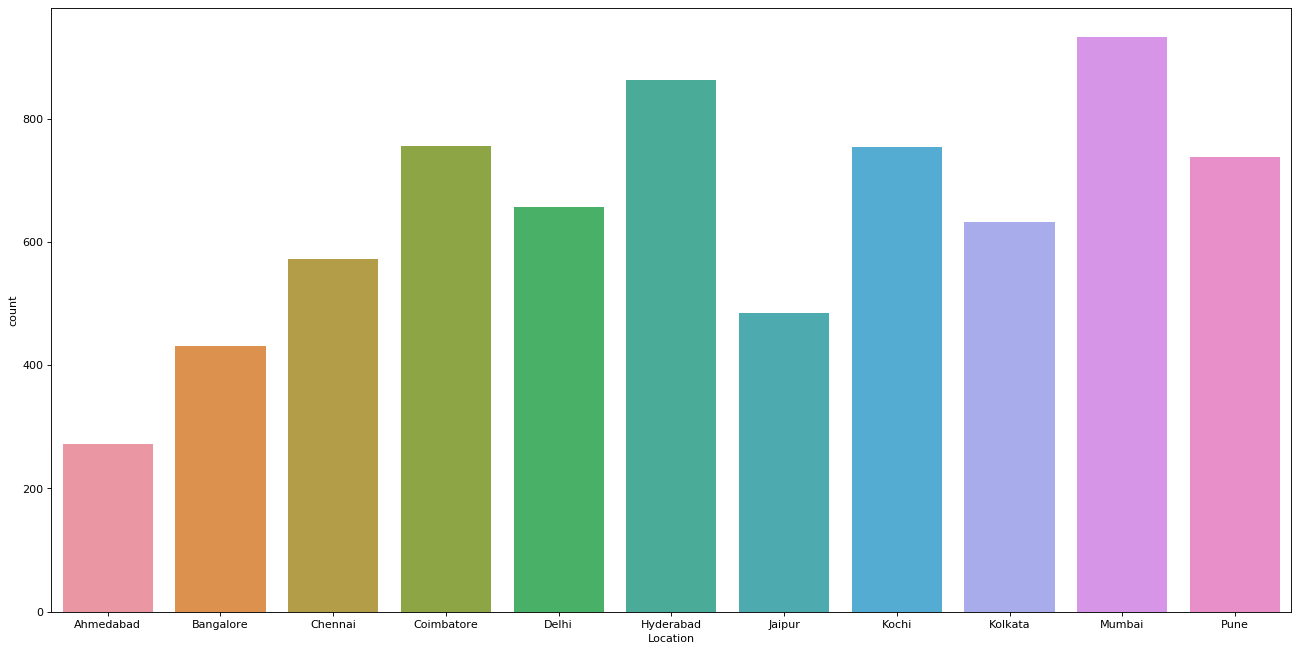

In [36]:
#Univariate analysis- Location
figure(figsize=(20,10), dpi=80)
print(f'There are {df.Location.nunique()} unique Locations.')
print(' ')
print(f'{df.Location.value_counts(ascending=False)}')

sns.countplot(x=df['Location']); 

### Observations:

- Used car sales are highest in Mumbai, followed by Hyderabad.
- Used car sales are least in Ahmedabad.

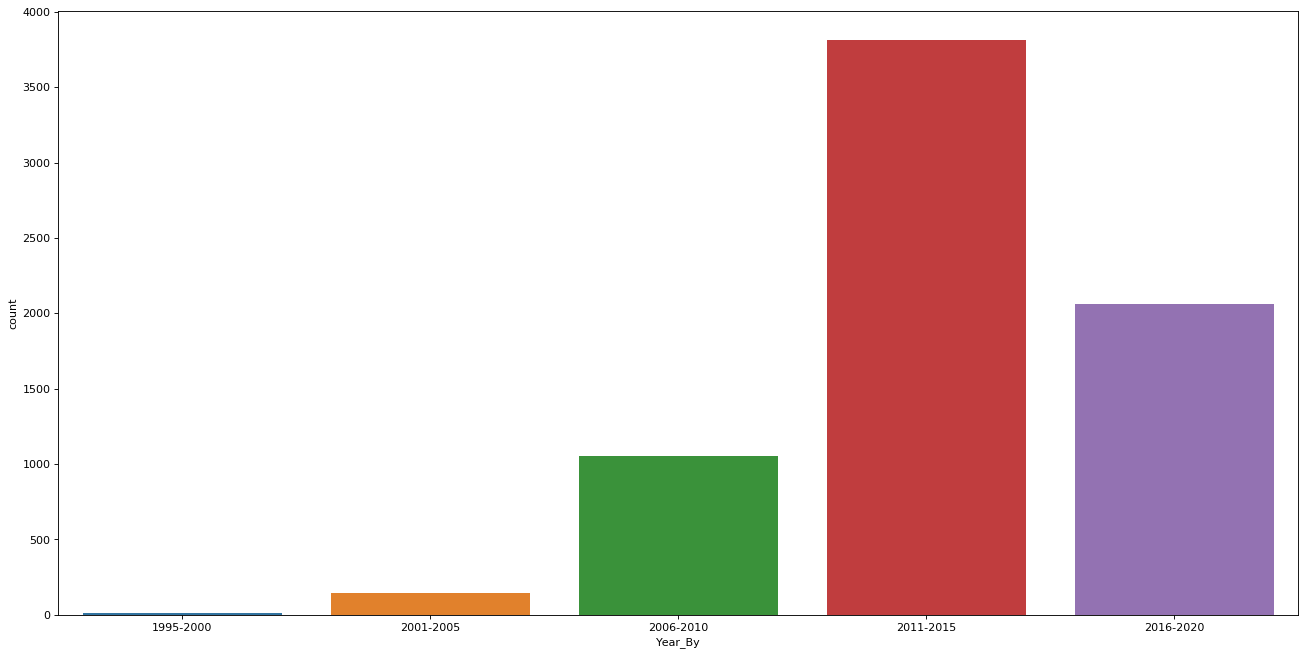

In [37]:
#Univariate analysis- Year_By
figure(figsize=(20,10), dpi=80)
sns.countplot(x=df['Year_By']); 

There are 5 unique Fuel Types.
 
Diesel      3772
Petrol      3243
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


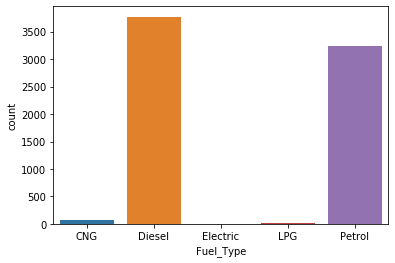

In [38]:
#Univariate analysis- Fuel_Types
print(f'There are {df.Fuel_Type.nunique()} unique Fuel Types.')
print(' ')
print(f'{df.Fuel_Type.value_counts(ascending=False)}')
sns.countplot(x=df['Fuel_Type']); 

### Observations:

- Diesel cars are the most preferred cars in the used car market, followed by Petrol cars.

There are 2 unique Transmission Types.
 
Manual       5055
Automatic    2036
Name: Transmission, dtype: int64


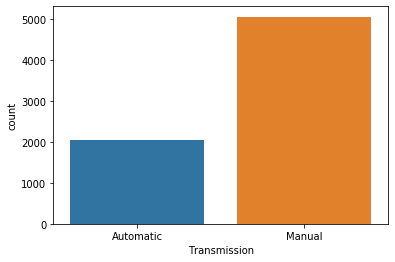

In [39]:
#Univariate analysis Transmission
print(f'There are {df.Transmission.nunique()} unique Transmission Types.')
print(' ')
print(f'{df.Transmission.value_counts(ascending=False)}')
sns.countplot(x=df['Transmission']); 

### Observations:

- Manual Transmission cars are the most preferred cars in the used car market, followed by Automatic Transmission cars.

There are 4 unique Owner Type.
 
First             5837
Second            1116
Third              126
Fourth & Above      12
Name: Owner_Type, dtype: int64


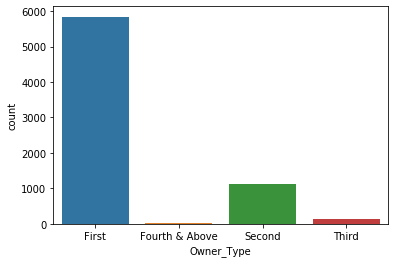

In [40]:
#Univariate analysis- Owner_Type
print(f'There are {df.Owner_Type.nunique()} unique Owner Type.')
print(' ')
print(f'{df.Owner_Type.value_counts(ascending=False)}')

sns.countplot(x=df['Owner_Type']); 

### Observations:

- Car resale from First owners are most preferred in the used cars market.

There are 25 unique Car Companies.
 
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               2
Bentley             2
Name: Company, dtype: int64


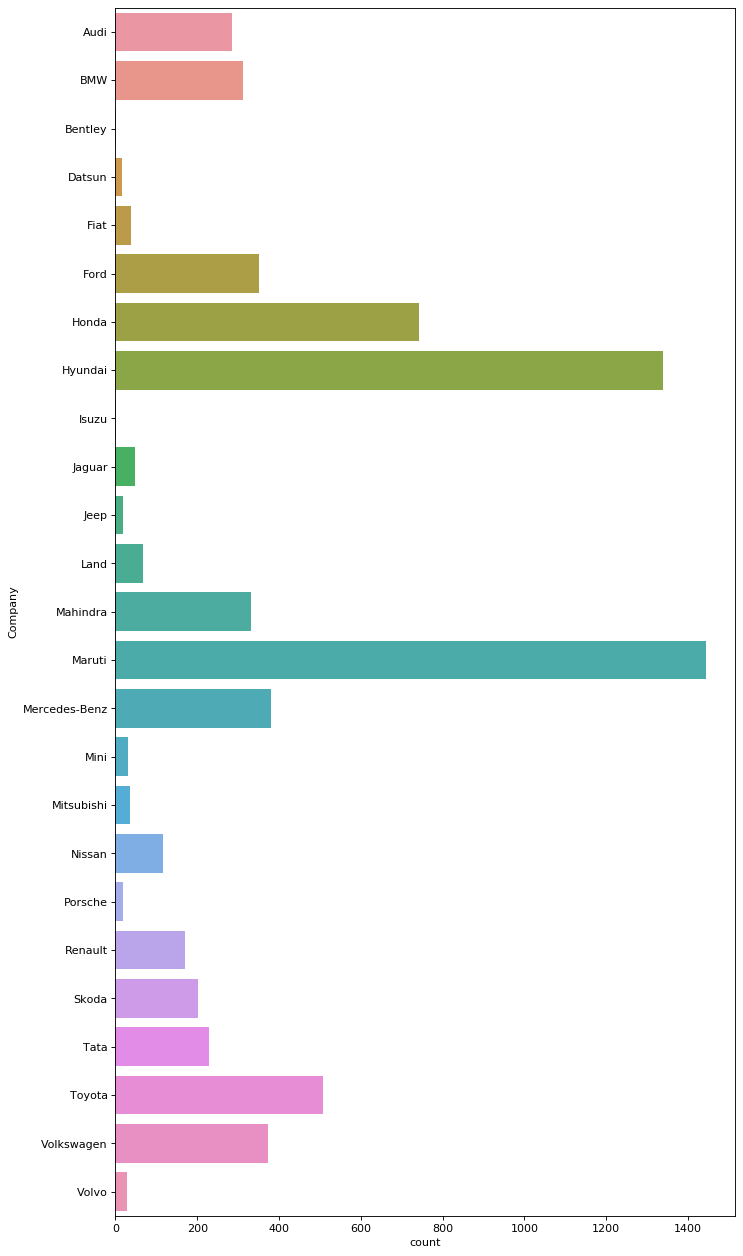

In [41]:
#Univariate analysis- Car Company
figure(figsize=(10, 20), dpi=80)
print(f'There are {df.Company.nunique()} unique Car Companies.')
print(' ')
print(f'{df.Company.value_counts(ascending=False)}')
sns.countplot(y=df['Company']); 

### Observations:

- Maruti is the most sold car in the used car market followed by Hyundai and Honda.


There are 9 unique Seat Number categories
 
5.0     5966
7.0      784
8.0      163
4.0      115
6.0       38
2.0       16
10.0       6
9.0        2
0.0        1
Name: Seats, dtype: int64


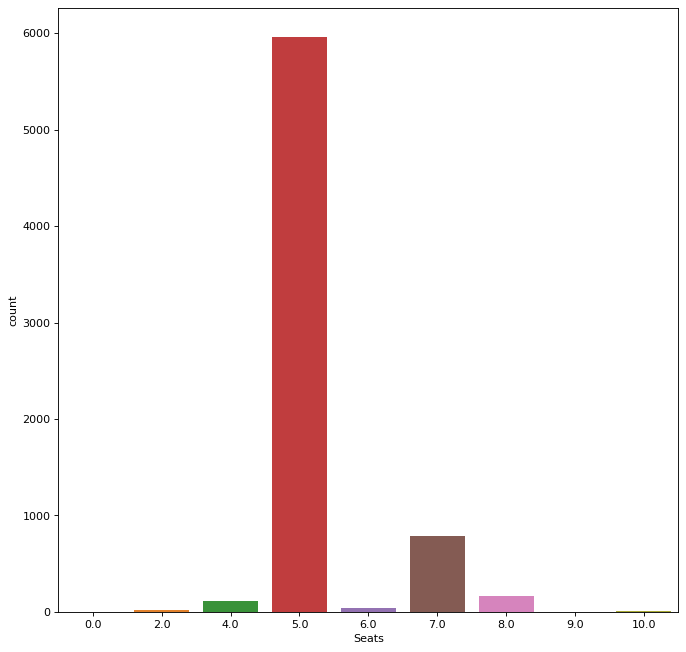

In [42]:
#Univariate analysis- Seats
figure(figsize=(10, 10), dpi=80)
print(f'There are {df.Seats.nunique()} unique Seat Number categories')
print(' ')
print(f'{df.Seats.value_counts(ascending=False)}')
sns.countplot(x=df['Seats']); 

### Observations:

- Most used cars sold are 5 seater, followed by 7 seater car.

## EDA- Univariate Continous Variables.

#### Analyze following variables:
    - Mileage           
    - Engine
    - Power
    - Seats
    - New_Price
    - Price
    - Kilometers_Driven


In [43]:
df.describe()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
count,7.091000e+03,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000
mean,5.857065e+04,18.147073,1620.012974,112.703595,18.470192,9.373224
std,8.520718e+04,4.571676,594.137881,52.925682,17.781365,10.621793
min,1.710000e+02,0.000000,72.000000,34.200000,1.000000,0.440000
25%,3.379650e+04,15.200000,1198.000000,78.900000,7.870000,3.850000
50%,5.300000e+04,18.160000,1493.000000,94.000000,11.105000,5.450000
75%,7.300000e+04,21.100000,1968.000000,138.030000,23.250000,10.000000
max,6.500000e+06,33.540000,5998.000000,616.000000,99.920000,160.000000


In [44]:
#Skewness of the dataframe
df.skew()

Kilometers_Driven    61.276928
Mileage              -0.446711
Engine                1.401902
Power                 1.945145
Seats                 1.905787
New_Price             1.744816
Price                 3.265235
dtype: float64

### Observations:

- Mileage is approximately normal.
- Engine, Power, Seats, Price and New_Price is highly positively skewed.
- We will need to treat highly skewed "Kilometers_Driven" column.

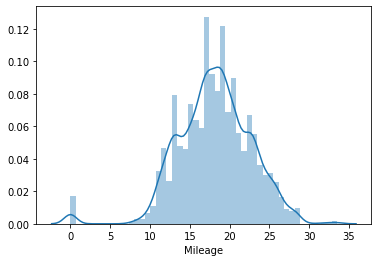

In [45]:
#Distribution plot of "Mileage" with KDE plot.
sns.distplot(df['Mileage'],kde=True); 

### Observations:

- Mileage is approximately normal.

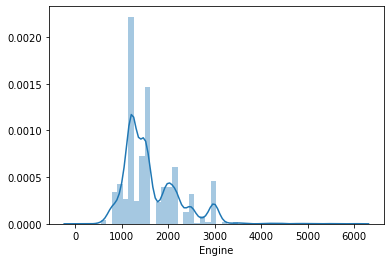

In [46]:
#Distribution plot of "Engine" with KDE plot.
sns.distplot(df['Engine'],kde=True);

### Observations:

- Engine is right (positively) skewed with couple of medians.

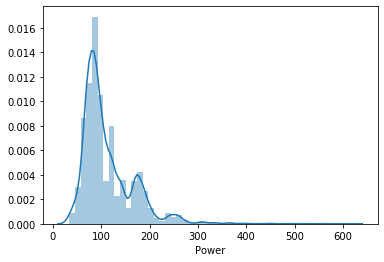

In [47]:
#Distribution plot of "Price" with KDE plot.
sns.distplot(df['Power'],kde=True);

### Observations:

- Power is right (positively) skewed

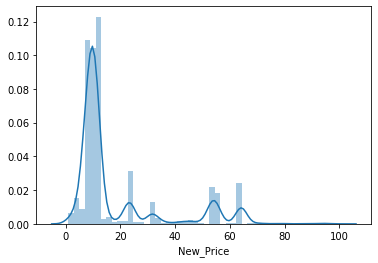

In [48]:
#Distribution plot of "New_Price" with KDE plot.
sns.distplot(df['New_Price'],kde=True);

### Observations:

- New_Price is right (positively) skewed.

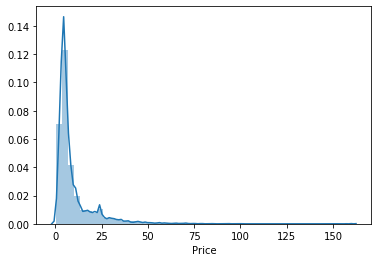

In [49]:
#Distribution plot of "Price" with KDE plot.
sns.distplot(df['Price'],kde=True);

### Observations:

- Price is right (positively) skewed.

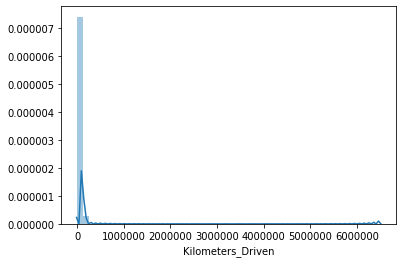

In [50]:
sns.distplot(df['Kilometers_Driven'],kde=True); 

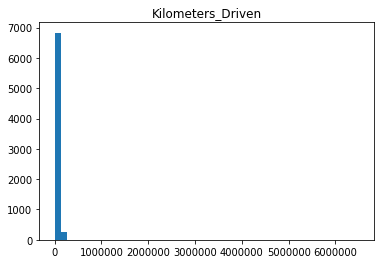

Count of entries with 0 or negative value=0


In [51]:
#Plot Kilometers_Driven in Histogram plot.
plt.hist(df['Kilometers_Driven'], bins=50)
plt.title('Kilometers_Driven')
plt.show()
print(f'Count of entries with 0 or negative value={np.sum(df.Kilometers_Driven <= 0)}')

### Observations:

- Since "Kilometers_Driven" column is highly skewed and does not have any non positive (or zero values) we will do log transformation on that column.

### Log Normal Scaling of Kilometers_Driven column

In [52]:

#Lets add new column "Kilometers_Driven_log" with log transformed values.
cols_to_log = ['Kilometers_Driven']

for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)

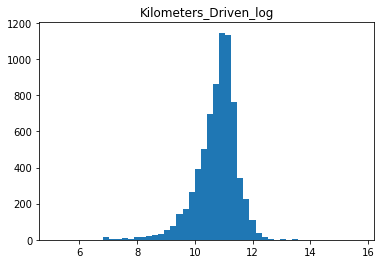

0


In [53]:
#Plot Kilometers_Driven_log in Histogram plot.
cols_to_log2 = ['Kilometers_Driven_log']
for colname in cols_to_log2:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

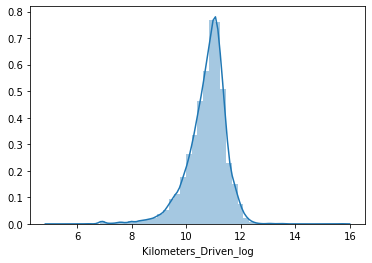

In [54]:
#Distribution plot of "Kilometers_Driven_log" with KDE plot.
sns.distplot(df['Kilometers_Driven_log'],kde=True); 


### Observations:
- After log transformation, the Kilometers Driven distribution is closer to normal than the original distribution.

#### Let's drop Kilometers_Driven column as we have the log scaled column Kilometers_Driven_log

In [55]:
df.drop('Kilometers_Driven',inplace=True, axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7091 non-null   category
 1   Year_By                7091 non-null   category
 2   Fuel_Type              7091 non-null   category
 3   Transmission           7091 non-null   category
 4   Owner_Type             7091 non-null   category
 5   Mileage                7091 non-null   float64 
 6   Engine                 7091 non-null   float64 
 7   Power                  7091 non-null   float64 
 8   Seats                  7091 non-null   category
 9   New_Price              7091 non-null   float64 
 10  Price                  7091 non-null   float64 
 11  Company                7091 non-null   category
 12  Model                  7091 non-null   category
 13  Kilometers_Driven_log  7091 non-null   float64 
dtypes: category(8), float64(6)
memory usage:

## Outlier Analysis and Treatment of Numerical Columns

    - Mileage
    - Engine
    - Power
    - New_Price
    - Price
    - Kilometers_Driven_log

In [57]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(f'Here are the numeric columns for which we will do outlier analysis\n\n{numeric_columns}')

Here are the numeric columns for which we will do outlier analysis

['Mileage', 'Engine', 'Power', 'New_Price', 'Price', 'Kilometers_Driven_log']


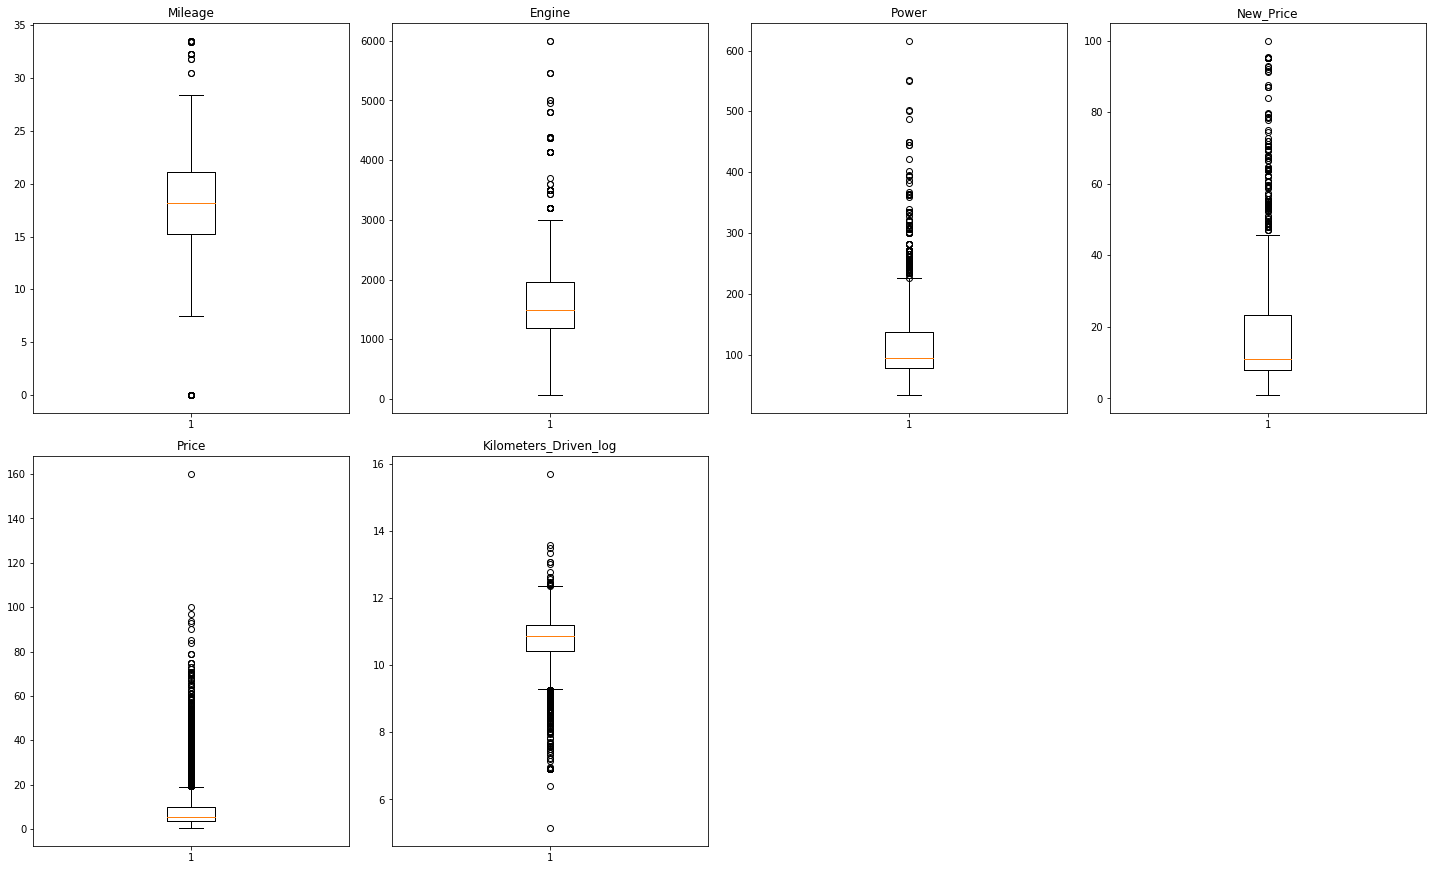

In [58]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [59]:
#Treat Outliers
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    


In [60]:
#List the numerical columns in the dataframe and call function 'treat_outliers'
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

In [61]:
# list the treated numerical columns in numeric_columns.
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

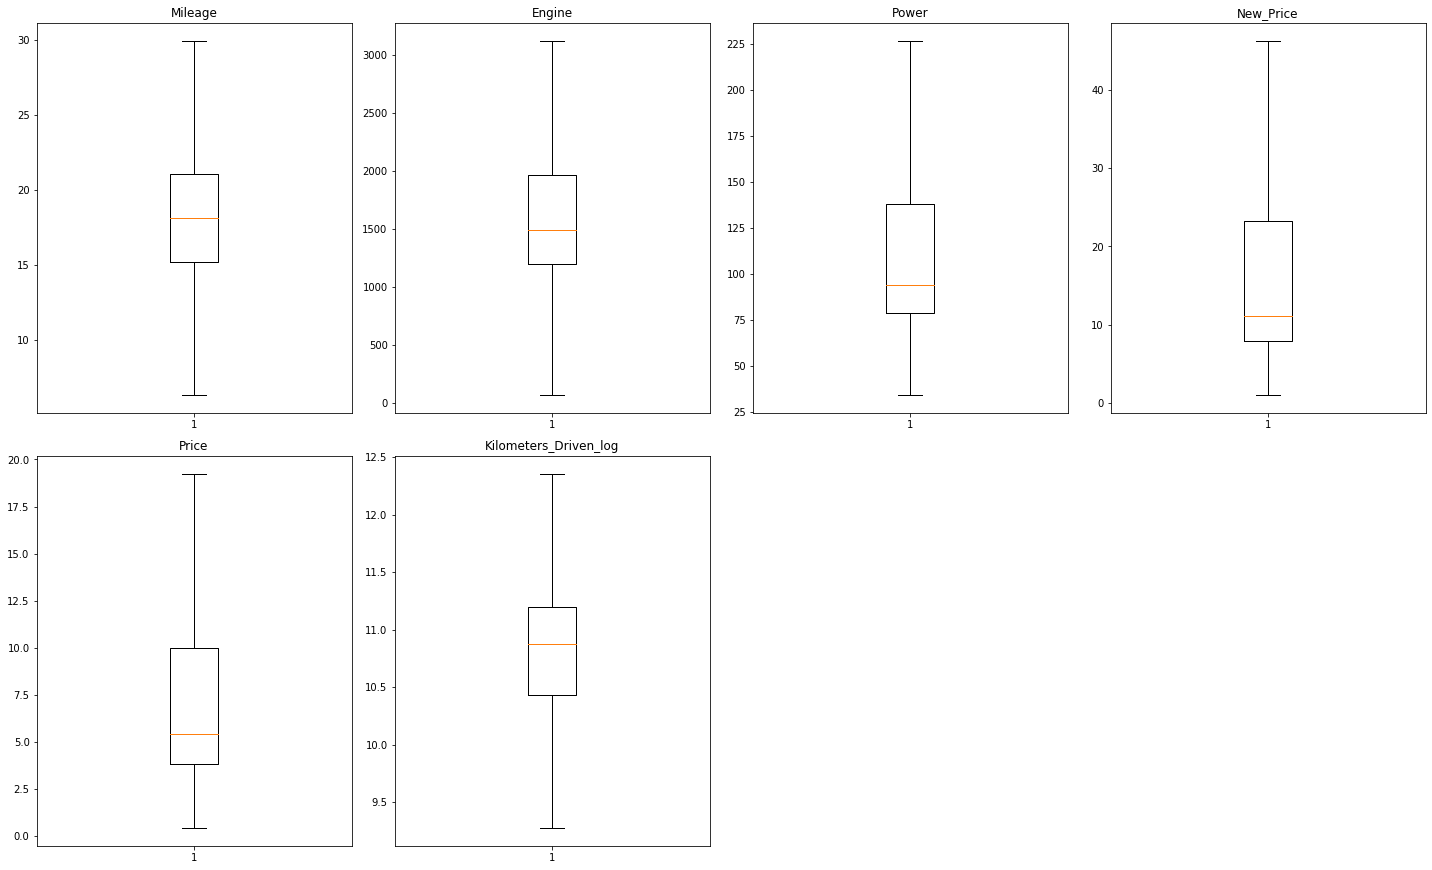

In [62]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Observations:

- All the outliers are treated.

## Bivariate Analysis

Median Price of New Cars by Location
  
Location
Coimbatore    7.720
Bangalore     6.850
Kochi         6.535
Hyderabad     5.680
Mumbai        5.600
Ahmedabad     5.500
Delhi         5.495
Chennai       4.750
Pune          4.600
Jaipur        4.500
Kolkata       4.150
Name: Price, dtype: float64


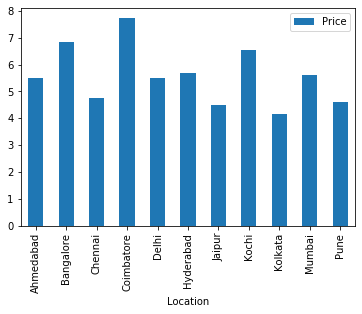

In [63]:
#Bivariate analysis, median Price (in Lakh) of car per Location
print('Median Price of New Cars by Location')
print('  ')
print(df.groupby('Location')['Price'].median().sort_values(ascending=False))
df.groupby(['Location'])[["Price"]].median().plot(kind='bar');

### Observations:

- Used car median price in Coimbatore is highest followed by Bangalore.

Median Price of New Cars by Year_By
  
Year_By
2016-2020    7.500
2011-2015    5.345
2006-2010    3.130
2001-2005    1.450
1995-2000    0.850
Name: Price, dtype: float64


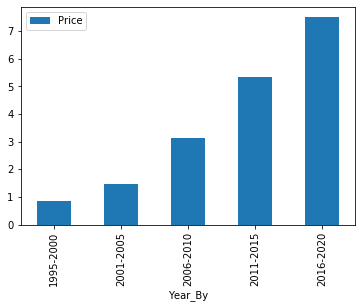

In [64]:
#Bivariate analysis, median Price (in Lakh) of car per Year_By
print('Median Price of New Cars by Year_By')
print('  ')
print(df.groupby('Year_By')['Price'].median().sort_values(ascending=False))
df.groupby(['Year_By'])[["Price"]].median().plot(kind='bar');

### Observations:

- In last 5 years, the median resale price of used cars has increased.
- The median price of used cars is continously increasing.

Median Price of New Cars by Fuel_Type
  
Fuel_Type
Electric    12.875
Diesel       7.570
Petrol       4.450
CNG          3.280
LPG          2.850
Name: Price, dtype: float64


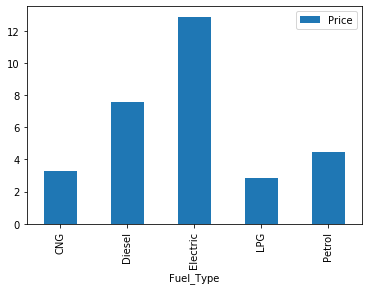

In [65]:
#Bivariate analysis, median Price (in Lakh) of car per Fuel_Type
print('Median Price of New Cars by Fuel_Type')
print('  ')
print(df.groupby('Fuel_Type')['Price'].median().sort_values(ascending=False))
df.groupby(['Fuel_Type'])[["Price"]].median().plot(kind='bar');

### Observations:

- Median price of Electric used cars is highest, followed by diesel and petrol.

Median Price of New Cars by Transmission
  
Transmission
Automatic    16.5
Manual        4.6
Name: Price, dtype: float64


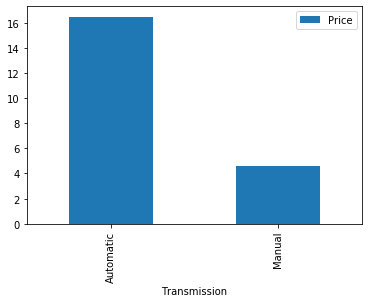

In [66]:
#Bivariate analysis, median Price (in Lakh) of car per Transmission
print('Median Price of New Cars by Transmission')
print('  ')
print(df.groupby('Transmission')['Price'].median().sort_values(ascending=False))
df.groupby(['Transmission'])[["Price"]].median().plot(kind='bar');

### Observations:

- Median used car price of Automatic vehicle is higher than Manual vehicle.

Median Price of New Cars by Owner_Type
  
Owner_Type
First             5.650
Second            4.600
Third             3.250
Fourth & Above    3.125
Name: Price, dtype: float64


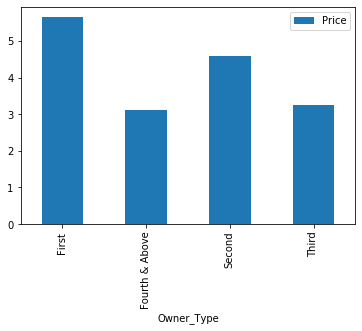

In [67]:
#Bivariate analysis, median Price (in Lakh) of car per Owner_Type
print('Median Price of New Cars by Owner_Type')
print('  ')
print(df.groupby('Owner_Type')['Price'].median().sort_values(ascending=False))
df.groupby(['Owner_Type'])[["Price"]].median().plot(kind='bar');

### Observations:

- Median used car price of First resale is higher than second resale.
- Third and above ownership (resale) reduces the median price.

Median Price of New Cars by Company
  
Company
Audi             19.225
Mercedes-Benz    19.225
BMW              19.225
Bentley          19.225
Isuzu            19.225
Jaguar           19.225
Porsche          19.225
Land             19.225
Mini             19.225
Jeep             18.500
Volvo            18.250
Toyota           10.750
Mitsubishi        9.950
Mahindra          7.570
Skoda             6.000
Renault           5.490
Ford              5.345
Honda             4.950
Volkswagen        4.890
Hyundai           4.600
Nissan            4.300
Maruti            4.150
Datsun            3.100
Tata              2.900
Fiat              2.600
Name: Price, dtype: float64


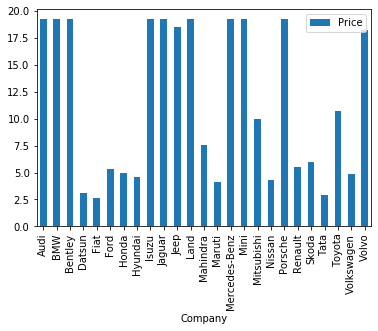

In [68]:
#Bivariate analysis, median Price (in Lakh) of car per Company
print('Median Price of New Cars by Company')
print('  ')
print(df.groupby('Company')['Price'].median().sort_values(ascending=False))
df.groupby(['Company'])[["Price"]].median().plot(kind='bar');

### Observations:

- Median used car price of Luxury brands like Audi, BMW, Mercedes-Benz is higher than the other brands in used car market.

In [69]:
#Lets find the unique levels in each categorical columns
print(f'Unique levels in Location= {len(pd.unique(df.Location))}')
print(f'Unique levels in Fuel_Type= {len(pd.unique(df.Fuel_Type))}')
print(f'Unique levels in Transmission= {len(pd.unique(df.Transmission))}')
print(f'Unique levels in Owner_Type= {len(pd.unique(df.Owner_Type))}')
print(f'Unique levels in Year_By= {len(pd.unique(df.Year_By))}')
print(f'Unique levels in Company= {len(pd.unique(df.Company))}')
print(f'Unique levels in Model= {len(pd.unique(df.Model))}')
print(f'Unique levels in Seats= {len(pd.unique(df.Seats))}')

Unique levels in Location= 11
Unique levels in Fuel_Type= 5
Unique levels in Transmission= 2
Unique levels in Owner_Type= 4
Unique levels in Year_By= 5
Unique levels in Company= 25
Unique levels in Model= 204
Unique levels in Seats= 9


### Observations:

- Since Model has over 200 unique levels, we will not create the dummy vars for this column, for rest, lets create the dummy vars.

## Check Correlation

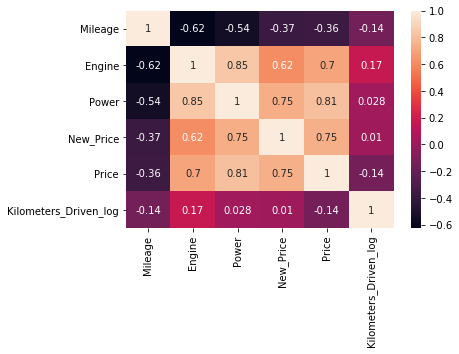

In [70]:
corr = df.corr()
sns.heatmap(corr, annot=True); #correlation matrix between different columns

### Observations:

- Engine and Power are positively correlated to Price of used car.
- Price is negatively correlated to Kilometers Driven (log scaled column).


## One Hot Encoding- create dummy variables for categorical values

    - Location
    - Year_By
    - Fuel_Type
    - Transmission
    - Owner_Type
    - Company
   
   ###### We will skip 'Model' variable from One Hot Encoding as it has over 200 unique values, as we saw before
   

In [71]:
df = pd.get_dummies(df, columns=['Location'])
df = pd.get_dummies(df, columns=['Year_By'])
df = pd.get_dummies(df, columns=['Fuel_Type'])
df = pd.get_dummies(df, columns=['Transmission'])
df = pd.get_dummies(df, columns=['Owner_Type'])
df = pd.get_dummies(df, columns=['Company'])
df = pd.get_dummies(df, columns=['Seats'])


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7252
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Mileage                    7091 non-null   float64 
 1   Engine                     7091 non-null   float64 
 2   Power                      7091 non-null   float64 
 3   New_Price                  7091 non-null   float64 
 4   Price                      7091 non-null   float64 
 5   Model                      7091 non-null   category
 6   Kilometers_Driven_log      7091 non-null   float64 
 7   Location_Ahmedabad         7091 non-null   uint8   
 8   Location_Bangalore         7091 non-null   uint8   
 9   Location_Chennai           7091 non-null   uint8   
 10  Location_Coimbatore        7091 non-null   uint8   
 11  Location_Delhi             7091 non-null   uint8   
 12  Location_Hyderabad         7091 non-null   uint8   
 13  Location_Jaipur            7091 n

### Drop the dummy vars, that will not add any value (if there are n levels in the categorical variable, create n-1 dummy vars for that column.)

In [73]:
df.drop('Owner_Type_Fourth & Above',inplace=True, axis=1)
df.drop('Fuel_Type_CNG',inplace=True, axis=1)
df.drop('Transmission_Manual',inplace=True, axis=1)
df.drop('Year_By_2016-2020',inplace=True, axis=1)
df.drop('Location_Ahmedabad',inplace=True, axis=1)
df.drop('Company_Datsun',inplace=True, axis=1)
df.drop('Seats_0.0',inplace=True, axis=1)


## Linear Model Creation and Training

In [74]:
#Split Data for Linear Model
# independant variables
X = df.drop(['Price','Model'], axis=1)
# the dependent variable
y = df[['Price']]

In [75]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [76]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Mileage is -0.07937704766475603
The coefficient for Engine is 0.00010000282638066883
The coefficient for Power is 0.03561155950442796
The coefficient for New_Price is 0.05434223641355018
The coefficient for Kilometers_Driven_log is -0.7903337688676733
The coefficient for Location_Bangalore is 0.8032004877646801
The coefficient for Location_Chennai is 0.060032613630473186
The coefficient for Location_Coimbatore is 0.6527905187322809
The coefficient for Location_Delhi is -0.5073613897045703
The coefficient for Location_Hyderabad is 0.4314693125234725
The coefficient for Location_Jaipur is 0.10531394825959961
The coefficient for Location_Kochi is 0.23684048363001495
The coefficient for Location_Kolkata is -1.13451174225929
The coefficient for Location_Mumbai is -0.42588309767755933
The coefficient for Location_Pune is -0.06481402371227396
The coefficient for Year_By_1995-2000 is -4.973767838485363
The coefficient for Year_By_2001-2005 is -4.3116675099393476
The coeffic

In [78]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 15.333466034855626


In [79]:
regression_model.score(X_train, y_train)

0.8715231914816532

In [80]:
#out of sample score (R^2)
regression_model.score(X_test, y_test)


0.8645064123863024

## Checking the Linear Regression Assumptions

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **Linearity of variables**
4. **No Heteroscedacity**
5. **Normality of error terms**

## 1. Treat Mulicolinearity among independent variables with vif score.
####  Removing Multicollinearity
To remove multicollinearity
  1. We will drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Then drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till we get all VIF scores under 5

In [81]:
#Multicolinearity
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [82]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(regression_model, X_train, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.022981  1.476866  26.925395  0.871523      0.869977


In [83]:
# Checking model performance on train set
print('Testing Performance\n')
print(model_perf(regression_model, X_test, y_test))

Testing Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.062959  1.495373  26.615817  0.864506      0.860641


In [84]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

,Mileage,Engine,Power,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_By_1995-2000,Year_By_2001-2005,Year_By_2006-2010,Year_By_2011-2015,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Company_Audi,Company_BMW,Company_Bentley,Company_Fiat,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Land,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,const
0,26.60,998.0,58.16,7.87,11.184435,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,19.67,1582.0,126.20,9.74,10.621352,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,18.20,1199.0,88.70,8.61,10.736418,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,20.77,1248.0,88.76,7.87,11.373675,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,15.20,1968.0,140.80,46.32,10.613271,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Mileage                      3.614768
Engine                       9.704063
Power                        8.526884
New_Price                   25.088749
Kilometers_Driven_log        1.906629
Location_Bangalore           2.471322
Location_Chennai             2.917428
Location_Coimbatore          3.487009
Location_Delhi               3.124973
Location_Hyderabad           3.713409
Location_Jaipur              2.646811
Location_Kochi               3.466835
Location_Kolkata             3.095375
Location_Mumbai              3.946136
Location_Pune                3.382238
Year_By_1995-2000            1.040109
Year_By_2001-2005            1.374262
Year_By_2006-2010            2.346492
Year_By_2011-2015            1.991770
Fuel_Type_Diesel            30.895838
Fuel_Type_Electric           1.047072
Fuel_Type_LPG                1.214879
Fuel_Type_Petrol            31.355040
Transmission_Automatic       2.339646
Owner_Type_First            88.333195
Owner_Type_Seco

In [86]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [87]:
high_vif_columns = ["Engine","Power","New_Price","Fuel_Type_Diesel","Fuel_Type_Petrol","Owner_Type_First","Owner_Type_Second","Owner_Type_Third","Company_Audi","Company_BMW","Company_Ford","Company_Honda","Company_Hyundai","Company_Jaguar","Company_Land","Company_Mahindra","Company_Maruti","Company_Mercedes-Benz","Company_Nissan","Company_Renault","Company_Skoda","Company_Tata","Company_Toyota","Company_Volkswagen","Seats_2.0","Seats_4.0","Seats_5.0","Seats_6.0","Seats_7.0","Seats_8.0","Seats_10.0"]

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
21           Company_Tata                    0.869977   2.062961
5        Owner_Type_First                    0.869975   2.063262
6       Owner_Type_Second                    0.869972   2.062514
0                  Engine                    0.869967   2.063356
7        Owner_Type_Third                    0.869955   2.062104
30             Seats_10.0                    0.869946   2.065061
4        Fuel_Type_Petrol                    0.869935   2.063402
24              Seats_2.0                    0.869932   2.063584
15       Company_Mahindra                    0.869911   2.064935
28              Seats_7.0                    0.869901   2.063185
18         Company_Nissan                    0.869897   2.064338
20          Company_Skoda                    0.869892   2.062760
23     Company_Volkswagen                    0.869876   2.064150
25              Seats_4.0                    0.869871   2.063279
29              Seats_8.0

In [88]:
# Dropping Company_Tata would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Company_Tata and check the vif again

X_train2 = X_train1.drop('Company_Tata', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Mileage                      3.623395
Engine                      10.012446
Power                        8.710976
New_Price                   23.443367
Kilometers_Driven_log        1.985898
Location_Bangalore           2.498680
Location_Chennai             2.970170
Location_Coimbatore          3.513619
Location_Delhi               3.045138
Location_Hyderabad           3.701959
Location_Jaipur              2.740041
Location_Kochi               3.618833
Location_Kolkata             3.127199
Location_Mumbai              3.934795
Location_Pune                3.379362
Year_By_1995-2000            1.043981
Year_By_2001-2005            1.356418
Year_By_2006-2010            2.411400
Year_By_2011-2015            2.040902
Fuel_Type_Diesel            29.304767
Fuel_Type_Electric           1.046237
Fuel_Type_LPG                1.197108
Fuel_Type_Petrol            29.872976
Transmission_Automatic       2.355694
Owner_Type_First            82.965042
Owner_Type_Seco

In [89]:
high_vif_columns = ["Engine","Power","New_Price","Fuel_Type_Diesel","Fuel_Type_Petrol","Owner_Type_First","Owner_Type_Second","Owner_Type_Third","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota","Seats_2.0","Seats_4.0","Seats_5.0","Seats_6.0","Seats_7.0","Seats_8.0"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
5        Owner_Type_First                    0.869975   2.063262
6       Owner_Type_Second                    0.869972   2.062514
0                  Engine                    0.869967   2.063356
7        Owner_Type_Third                    0.869955   2.062104
4        Fuel_Type_Petrol                    0.869935   2.063402
14              Seats_2.0                    0.869932   2.063584
18              Seats_7.0                    0.869901   2.063185
15              Seats_4.0                    0.869871   2.063279
19              Seats_8.0                    0.869868   2.063470
17              Seats_6.0                    0.869867   2.063100
16              Seats_5.0                    0.869833   2.063016
10        Company_Hyundai                    0.869767   2.065504
11         Company_Maruti                    0.869728   2.066085
3        Fuel_Type_Diesel                    0.869596   2.063464
2               New_Price

In [90]:
# Dropping Owner_Type_First would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Owner_Type_First and check the vif again

X_train3 = X_train2.drop('Owner_Type_First', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Mileage                      3.622771
Engine                      10.008814
Power                        8.710976
New_Price                   23.442900
Kilometers_Driven_log        1.984275
Location_Bangalore           2.494732
Location_Chennai             2.968777
Location_Coimbatore          3.513400
Location_Delhi               3.045130
Location_Hyderabad           3.701690
Location_Jaipur              2.739980
Location_Kochi               3.618830
Location_Kolkata             3.127199
Location_Mumbai              3.934602
Location_Pune                3.379255
Year_By_1995-2000            1.043981
Year_By_2001-2005            1.346737
Year_By_2006-2010            2.409039
Year_By_2011-2015            2.040637
Fuel_Type_Diesel            29.304111
Fuel_Type_Electric           1.046235
Fuel_Type_LPG                1.197103
Fuel_Type_Petrol            29.871751
Transmission_Automatic       2.355599
Owner_Type_Second            1.175761
Owner_Type_Thir

In [91]:
high_vif_columns = ["Engine","Power","New_Price","Fuel_Type_Diesel","Fuel_Type_Petrol","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota","Seats_2.0","Seats_4.0","Seats_5.0","Seats_6.0","Seats_7.0","Seats_8.0"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
0                  Engine                    0.869967   2.063356
4        Fuel_Type_Petrol                    0.869935   2.063402
11              Seats_2.0                    0.869932   2.063584
15              Seats_7.0                    0.869901   2.063185
12              Seats_4.0                    0.869871   2.063279
16              Seats_8.0                    0.869868   2.063470
14              Seats_6.0                    0.869867   2.063100
13              Seats_5.0                    0.869833   2.063016
7         Company_Hyundai                    0.869767   2.065504
8          Company_Maruti                    0.869728   2.066085
3        Fuel_Type_Diesel                    0.869596   2.063464
2               New_Price                    0.869230   2.071856
10         Company_Toyota                    0.868862   2.072750
6             Company_BMW                    0.868284   2.071840
9   Company_Mercedes-Benz

In [92]:
# Dropping Engine would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Fuel_Type_Petrol and check the vif again

X_train4 = X_train3.drop('Engine', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Mileage                      3.216555
Power                        4.976948
New_Price                   23.355090
Kilometers_Driven_log        1.983332
Location_Bangalore           2.494669
Location_Chennai             2.968106
Location_Coimbatore          3.513368
Location_Delhi               3.045025
Location_Hyderabad           3.701201
Location_Jaipur              2.739683
Location_Kochi               3.618754
Location_Kolkata             3.126980
Location_Mumbai              3.934024
Location_Pune                3.379112
Year_By_1995-2000            1.043692
Year_By_2001-2005            1.346638
Year_By_2006-2010            2.401333
Year_By_2011-2015            2.040524
Fuel_Type_Diesel            29.286972
Fuel_Type_Electric           1.038973
Fuel_Type_LPG                1.195882
Fuel_Type_Petrol            29.576167
Transmission_Automatic       2.355555
Owner_Type_Second            1.175450
Owner_Type_Third             1.103729
Company_Audi   

In [93]:
high_vif_columns = ["New_Price","Fuel_Type_Diesel","Fuel_Type_Petrol","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota","Seats_2.0","Seats_4.0","Seats_5.0","Seats_6.0","Seats_7.0","Seats_8.0"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
2        Fuel_Type_Petrol                    0.869935   2.063402
9               Seats_2.0                    0.869932   2.063584
13              Seats_7.0                    0.869901   2.063185
10              Seats_4.0                    0.869871   2.063279
14              Seats_8.0                    0.869868   2.063470
12              Seats_6.0                    0.869867   2.063100
11              Seats_5.0                    0.869833   2.063016
5         Company_Hyundai                    0.869767   2.065504
6          Company_Maruti                    0.869728   2.066085
1        Fuel_Type_Diesel                    0.869596   2.063464
0               New_Price                    0.869230   2.071856
8          Company_Toyota                    0.868862   2.072750
4             Company_BMW                    0.868284   2.071840
7   Company_Mercedes-Benz                    0.868150   2.074931
3            Company_Audi

In [94]:
# Dropping Fuel_Type_Petrol would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Fuel_Type_Petrol and check the vif again

X_train5 = X_train4.drop('Fuel_Type_Petrol', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

Mileage                      3.122453
Power                        4.970155
New_Price                   23.354972
Kilometers_Driven_log        1.973429
Location_Bangalore           2.494339
Location_Chennai             2.967056
Location_Coimbatore          3.511267
Location_Delhi               3.045025
Location_Hyderabad           3.700100
Location_Jaipur              2.736432
Location_Kochi               3.618549
Location_Kolkata             3.125470
Location_Mumbai              3.933358
Location_Pune                3.378941
Year_By_1995-2000            1.043639
Year_By_2001-2005            1.346539
Year_By_2006-2010            2.401265
Year_By_2011-2015            2.040414
Fuel_Type_Diesel             2.365810
Fuel_Type_Electric           1.015578
Fuel_Type_LPG                1.012220
Transmission_Automatic       2.354924
Owner_Type_Second            1.175287
Owner_Type_Third             1.103657
Company_Audi                 9.517117
Company_BMW    

In [95]:
high_vif_columns = ["New_Price","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota","Seats_2.0","Seats_4.0","Seats_5.0","Seats_6.0","Seats_7.0","Seats_8.0"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
7               Seats_2.0                    0.869932   2.063584
11              Seats_7.0                    0.869901   2.063185
8               Seats_4.0                    0.869871   2.063279
12              Seats_8.0                    0.869868   2.063470
10              Seats_6.0                    0.869867   2.063100
9               Seats_5.0                    0.869833   2.063016
3         Company_Hyundai                    0.869767   2.065504
4          Company_Maruti                    0.869728   2.066085
0               New_Price                    0.869230   2.071856
6          Company_Toyota                    0.868862   2.072750
2             Company_BMW                    0.868284   2.071840
5   Company_Mercedes-Benz                    0.868150   2.074931
1            Company_Audi                    0.867682   2.074001


In [96]:
# Dropping Seats_2.0 would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Seats_2.0 and check the vif again

X_train6 = X_train5.drop('Seats_2.0', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

Mileage                     3.119326
Power                       4.946219
New_Price                  23.324900
Kilometers_Driven_log       1.966525
Location_Bangalore          2.494335
Location_Chennai            2.967055
Location_Coimbatore         3.511067
Location_Delhi              3.044999
Location_Hyderabad          3.699402
Location_Jaipur             2.736416
Location_Kochi              3.618487
Location_Kolkata            3.125404
Location_Mumbai             3.933173
Location_Pune               3.378926
Year_By_1995-2000           1.043478
Year_By_2001-2005           1.345605
Year_By_2006-2010           2.397397
Year_By_2011-2015           2.038710
Fuel_Type_Diesel            2.365804
Fuel_Type_Electric          1.015551
Fuel_Type_LPG               1.012212
Transmission_Automatic      2.354078
Owner_Type_Second           1.175232
Owner_Type_Third            1.103657
Company_Audi                9.516934
Company_BMW                10.911752
Com

In [97]:
high_vif_columns = ["New_Price","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota","Seats_4.0","Seats_5.0","Seats_7.0","Seats_8.0"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                      col  Adj_rsq_after_dropping_col  Test RMSE
9               Seats_7.0                    0.869901   2.063185
7               Seats_4.0                    0.869871   2.063279
10              Seats_8.0                    0.869868   2.063470
8               Seats_5.0                    0.869833   2.063016
3         Company_Hyundai                    0.869767   2.065504
4          Company_Maruti                    0.869728   2.066085
0               New_Price                    0.869230   2.071856
6          Company_Toyota                    0.868862   2.072750
2             Company_BMW                    0.868284   2.071840
5   Company_Mercedes-Benz                    0.868150   2.074931
1            Company_Audi                    0.867682   2.074001


In [98]:
# Dropping Seats_7.0 would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Seats_7.0 and check the vif again

X_train7 = X_train6.drop('Seats_7.0', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

Mileage                     3.107432
Power                       4.946042
New_Price                  23.107992
Kilometers_Driven_log       1.957678
Location_Bangalore          2.494128
Location_Chennai            2.967055
Location_Coimbatore         3.511057
Location_Delhi              3.044888
Location_Hyderabad          3.698895
Location_Jaipur             2.736361
Location_Kochi              3.618471
Location_Kolkata            3.125390
Location_Mumbai             3.931257
Location_Pune               3.378892
Year_By_1995-2000           1.043412
Year_By_2001-2005           1.344213
Year_By_2006-2010           2.391874
Year_By_2011-2015           2.035267
Fuel_Type_Diesel            2.331244
Fuel_Type_Electric          1.015465
Fuel_Type_LPG               1.012197
Transmission_Automatic      2.353922
Owner_Type_Second           1.175134
Owner_Type_Third            1.103636
Company_Audi                9.390332
Company_BMW                10.770774
Com

In [99]:
high_vif_columns = ["New_Price","Company_Audi","Company_BMW","Company_Hyundai","Company_Maruti","Company_Mercedes-Benz","Company_Toyota"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                     col  Adj_rsq_after_dropping_col  Test RMSE
3        Company_Hyundai                    0.869767   2.065504
4         Company_Maruti                    0.869728   2.066085
0              New_Price                    0.869230   2.071856
6         Company_Toyota                    0.868862   2.072750
2            Company_BMW                    0.868284   2.071840
5  Company_Mercedes-Benz                    0.868150   2.074931
1           Company_Audi                    0.867682   2.074001


In [100]:
# Dropping Company_Hyundai would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Company_Hyundai and check the vif again

X_train8 = X_train7.drop('Company_Hyundai', axis=1)
vif_series8 = pd.Series([variance_inflation_factor(X_train8.values,i) for i in range(X_train8.shape[1])],index=X_train8.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series8))

Series before feature selection: 

Mileage                     3.104192
Power                       4.873134
New_Price                  22.666626
Kilometers_Driven_log       1.956414
Location_Bangalore          2.493540
Location_Chennai            2.966296
Location_Coimbatore         3.509296
Location_Delhi              3.043682
Location_Hyderabad          3.698780
Location_Jaipur             2.736298
Location_Kochi              3.617177
Location_Kolkata            3.125336
Location_Mumbai             3.931223
Location_Pune               3.378308
Year_By_1995-2000           1.043412
Year_By_2001-2005           1.341277
Year_By_2006-2010           2.388554
Year_By_2011-2015           2.024467
Fuel_Type_Diesel            2.303836
Fuel_Type_Electric          1.015465
Fuel_Type_LPG               1.011990
Transmission_Automatic      2.353922
Owner_Type_Second           1.174926
Owner_Type_Third            1.103625
Company_Audi                7.404132
Company_BMW                 8.479994
Com

In [101]:
high_vif_columns = ["New_Price","Company_Audi","Company_BMW","Company_Mercedes-Benz"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                     col  Adj_rsq_after_dropping_col  Test RMSE
0              New_Price                    0.869230   2.071856
2            Company_BMW                    0.868284   2.071840
3  Company_Mercedes-Benz                    0.868150   2.074931
1           Company_Audi                    0.867682   2.074001


In [102]:
# Dropping New_Price would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop New_Price and check the vif again

X_train9 = X_train8.drop('New_Price', axis=1)
vif_series9 = pd.Series([variance_inflation_factor(X_train9.values,i) for i in range(X_train9.shape[1])],index=X_train9.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series9))

Series before feature selection: 

Mileage                     3.099354
Power                       4.859589
Kilometers_Driven_log       1.956107
Location_Bangalore          2.493496
Location_Chennai            2.965069
Location_Coimbatore         3.508581
Location_Delhi              3.043266
Location_Hyderabad          3.698527
Location_Jaipur             2.734947
Location_Kochi              3.617011
Location_Kolkata            3.124442
Location_Mumbai             3.931181
Location_Pune               3.377298
Year_By_1995-2000           1.043412
Year_By_2001-2005           1.341013
Year_By_2006-2010           2.388547
Year_By_2011-2015           2.024012
Fuel_Type_Diesel            2.291246
Fuel_Type_Electric          1.015281
Fuel_Type_LPG               1.011963
Transmission_Automatic      2.345755
Owner_Type_Second           1.174172
Owner_Type_Third            1.103596
Company_Audi                1.862790
Company_BMW                 2.184347
Company_Bentley             1.028090
Com

## Observations

- VIF scrore for all the variables has come down to quite a good limit (all under 5). We can say that there is no multicollinearity now.

In [103]:
regression_model1 = LinearRegression(fit_intercept=False)
regression_model1.fit(X_train9,y_train)

print('Training Performance\n')
print(model_perf(regression_model1, X_train9, y_train))


Training Performance

       RMSE      MAE       MAPE       R^2  Adjusted R^2
0  2.052047  1.49922  27.664243  0.867805      0.866405


### Observations

* Earlier R-squared was 0.871, now it is 0.867.
* Now Adjusted R-squared is 0.866, Our model is able to explain 86.4% of variance that shows model is good.
* The Adjusted-R squared in initial model (regression_model) it was 86.9% (Where we considered all the variables) this shows that the variables we dropped affected the model by a small number.     

**Now we'll check rest of the assumptions on new model - regression_model1**

### 2. Mean of residuals should be 0

In [104]:
#Mean Residual should be zero

# predicted values
fitted = regression_model1.predict(X_train9)
residual = fitted - y_train.values

np.mean(residual)

1.0408813981328721e-13

### Observations:

- Mean of residual is 1.04, this is close to 0.

### 3. Test of Linearity

#### Plot fitted values vs Residuals, if they don’t follow any pattern, then the model is linear otherwise model is showing signs of non-linearity.

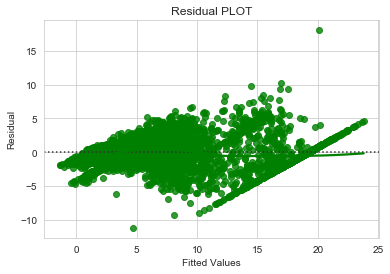

In [105]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="green",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### Observations:

- Since there is no pattern in residual plot, model is linear.

### 4. Test of Homoscedasticity

#### Since the variance is unequal for the residuals across the regression line, the data is heteroscedastic.
- As seen above, there is no pattern in residual plot. Hence, this assumption is satisfied.

### 5. Test for Normality 

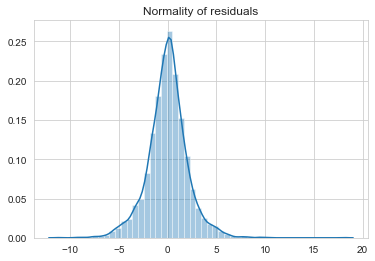

In [106]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

### Observations:

- Since the residuals are normally distributed, the assumption is satisfied.

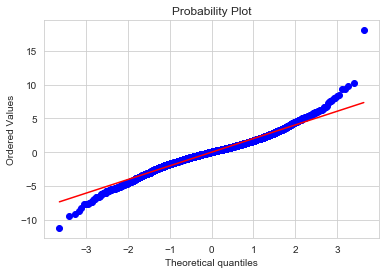

In [107]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

### Observations:
- As per QQ plot they are approximately normal. So, this assumption is also satisfied.

### Predicting on the test data

In [108]:
X_train9.columns

Index(['Mileage', 'Power', 'Kilometers_Driven_log', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Year_By_1995-2000', 'Year_By_2001-2005', 'Year_By_2006-2010',
       'Year_By_2011-2015', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Transmission_Automatic', 'Owner_Type_Second',
       'Owner_Type_Third', 'Company_Audi', 'Company_BMW', 'Company_Bentley',
       'Company_Fiat', 'Company_Ford', 'Company_Honda', 'Company_Isuzu',
       'Company_Jaguar', 'Company_Jeep', 'Company_Land', 'Company_Mahindra',
       'Company_Maruti', 'Company_Mercedes-Benz', 'Company_Mini',
       'Company_Mitsubishi', 'Company_Nissan', 'Company_Porsche',
       'Company_Renault', 'Company_Skoda', 'Company_Toyota',
       'Company_Volkswagen', 'Company_Volvo', 'Seats_4.0', 'Seats_5.0',
       'Seats_6.0', 'Seats

**Selecting columns from test data that we used to create our final model**

In [109]:
# first we add the constant to test input variables
X_test['constant'] = 1

X_test_final = X_test[X_train9.columns]

C:\Users\soumiya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
X_test_final.head()

,Mileage,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_By_1995-2000,Year_By_2001-2005,Year_By_2006-2010,Year_By_2011-2015,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Transmission_Automatic,Owner_Type_Second,Owner_Type_Third,Company_Audi,Company_BMW,Company_Bentley,Company_Fiat,Company_Ford,Company_Honda,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Land,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Toyota,Company_Volkswagen,Company_Volvo,Seats_4.0,Seats_5.0,Seats_6.0,Seats_8.0,Seats_9.0,Seats_10.0,constant
5078,24.3,88.50,9.989206,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5948,15.6,106.00,11.418626,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3008,26.6,58.16,10.789340,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2538,18.9,67.10,11.884496,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2782,23.0,90.00,11.319959,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [111]:
y_pred = regression_model1.predict(X_test_final)

**Checking the performance on train and test**

In [112]:
print('Training Performance\n')
print(model_perf(regression_model1, X_train9, y_train))

Training Performance

       RMSE      MAE       MAPE       R^2  Adjusted R^2
0  2.052047  1.49922  27.664243  0.867805      0.866405


In [113]:
print('Test Performance\n')
print(model_perf(regression_model1, X_test_final, y_test))

Test Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.083253  1.513139  26.990932  0.861828      0.858365


* **Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting.**

* **Hence we can conclude the model "regression_model1" is good for prediction as well as inference purpose.**


In [114]:
regression_model1 = LinearRegression(fit_intercept=False)
regression_model1.fit(X_train9,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(regression_model1.coef_.flatten(), \
                       index=X_train9.columns.tolist(), columns=['Coefficients'])
print(coef_df)

# model performance
print('\n\nTraining Performance\n')
print(model_perf(regression_model1, X_train9, y_train))

                        Coefficients
Mileage                    -0.078061
Power                       0.038404
Kilometers_Driven_log      -0.795770
Location_Bangalore          0.817353
Location_Chennai            0.004260
Location_Coimbatore         0.666855
Location_Delhi             -0.485620
Location_Hyderabad          0.417097
Location_Jaipur             0.062855
Location_Kochi              0.257744
Location_Kolkata           -1.151048
Location_Mumbai            -0.434762
Location_Pune              -0.108928
Year_By_1995-2000          -4.975660
Year_By_2001-2005          -4.181339
Year_By_2006-2010          -3.352069
Year_By_2011-2015          -1.389113
Fuel_Type_Diesel            1.527054
Fuel_Type_Electric          8.703585
Fuel_Type_LPG               1.028997
Transmission_Automatic      0.885006
Owner_Type_Second          -0.496652
Owner_Type_Third           -0.823520
Company_Audi                7.381129
Company_BMW                 6.366283
Company_Bentley             9.510791
C

### Observations
Now this is our final model which follows all the assumptions and this can be used for interpretations

1. Mileage, Kilometers_Driven, car's age and level of ownership (second and above) affects the used car's price negatively.
2. Luxury car brands like BMW, Audi, Bentley, Porche etc contributes positively to the used car price.
3. Electric Fuel type is also contributing positively to used car price.
4. Automatic used cars can sell for higher price than manual transmission.
5. Selling used cars in locations like Bangalore and Hyderabad, will increase the value of used car.

## Forward Feature Selection

In [115]:
#Forward Feature selection
X_train_new = X_train9.drop('constant', axis = 1)

In [116]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg,k_features = X_train_new.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.9s finished

[2021-05-06 22:21:35] Features: 1/51 -- score: 0.6527470337087034[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished

[2021-05-06 22:21:37] Features: 2/51 -- score: 0.6957113557834214[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.8s finished

[2021-05-06 22:21:39] Features: 3/51 -- score: 0.7145933079437097[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.0s finished

[2021-05-06 22:22:29] Features: 28/51 -- score: 0.8601303748061554[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished

[2021-05-06 22:22:31] Features: 29/51 -- score: 0.8606423062668483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.6s finished

[2021-05-06 22:22:33] Features: 30/51 -- score: 0.861045009028319[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished

[2021-05-06 22:22:34] Features: 31/5

**We can see that Adjusted-R square starts decreasing after addition of 45th feature, so we will proceed only with best 44 features**

* Now we'll change k_features to 44.

In [117]:
reg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(reg, k_features = 44, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.8s finished

[2021-05-06 22:22:58] Features: 1/44 -- score: 0.6527470337087034[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished

[2021-05-06 22:23:00] Features: 2/44 -- score: 0.6957113557834214[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.0s finished

[2021-05-06 22:23:02] Features: 3/44 -- score: 0.7145933079437097[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.6s finished

[2021-05-06 22:23:51] Features: 28/44 -- score: 0.8601303748061554[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished

[2021-05-06 22:23:52] Features: 29/44 -- score: 0.8606423062668483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.6s finished

[2021-05-06 22:23:54] Features: 30/44 -- score: 0.861045009028319[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished

[2021-05-06 22:23:56] Features: 31/4

In [118]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49]


In [119]:
X_train9.columns[feat_cols]

Index(['Mileage', 'Power', 'Kilometers_Driven_log', 'Location_Bangalore',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Year_By_1995-2000', 'Year_By_2001-2005', 'Year_By_2006-2010',
       'Year_By_2011-2015', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Transmission_Automatic', 'Owner_Type_Second',
       'Owner_Type_Third', 'Company_Audi', 'Company_BMW', 'Company_Bentley',
       'Company_Fiat', 'Company_Ford', 'Company_Honda', 'Company_Isuzu',
       'Company_Jaguar', 'Company_Jeep', 'Company_Land', 'Company_Mahindra',
       'Company_Maruti', 'Company_Mercedes-Benz', 'Company_Mini',
       'Company_Nissan', 'Company_Porsche', 'Company_Skoda', 'Company_Toyota',
       'Company_Volkswagen', 'Company_Volvo', 'Seats_4.0', 'Seats_5.0',
       'Seats_8.0', 'Seats_9.0'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [120]:
X_train_final = X_train9[X_train9.columns[feat_cols]]

In [121]:
X_test.columns

Index(['Mileage', 'Engine', 'Power', 'New_Price', 'Kilometers_Driven_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_By_1995-2000', 'Year_By_2001-2005',
       'Year_By_2006-2010', 'Year_By_2011-2015', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Owner_Type_First', 'Owner_Type_Second',
       'Owner_Type_Third', 'Company_Audi', 'Company_BMW', 'Company_Bentley',
       'Company_Fiat', 'Company_Ford', 'Company_Honda', 'Company_Hyundai',
       'Company_Isuzu', 'Company_Jaguar', 'Company_Jeep', 'Company_Land',
       'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz',
       'Company_Mini', 'Company_Mitsubishi', 'Company_Nissan',
       'Company_Porsche', 'Company_Renault', 'Company_Skoda', 'Company_Tata',
       'Com

In [122]:
#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [123]:
#Fitting linear model
regression_model2 = LinearRegression()
regression_model2.fit(X_train_final,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(regression_model2.coef_.flatten(), regression_model2.intercept_), \
                       index=X_train_final.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(regression_model2, X_train_final, y_train))

                        Coefficients
Mileage                    -0.080647
Power                       0.038689
Kilometers_Driven_log      -0.794424
Location_Bangalore          0.716648
Location_Coimbatore         0.546635
Location_Delhi             -0.593567
Location_Hyderabad          0.306739
Location_Kolkata           -1.259662
Location_Mumbai            -0.545215
Location_Pune              -0.216201
Year_By_1995-2000          -5.007706
Year_By_2001-2005          -4.233928
Year_By_2006-2010          -3.386604
Year_By_2011-2015          -1.407664
Fuel_Type_Diesel            1.535426
Fuel_Type_Electric          8.696152
Fuel_Type_LPG               1.019961
Transmission_Automatic      0.896464
Owner_Type_Second          -0.514397
Owner_Type_Third           -0.845672
Company_Audi                7.305450
Company_BMW                 6.279078
Company_Bentley             9.420107
Company_Fiat               -1.049141
Company_Ford                0.313461
Company_Honda               0.109014
C

In [124]:
# model performance on test set
print('Test Performance\n')
print(model_perf(regression_model2, X_test_final, y_test))

Test Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.087536  1.518559  27.094889  0.861259      0.858328


* **Both $R^2$ score and RMSE show that the model fitted is good, has no overfitting and can be used for making predictions.**
* **We can observe here that the results from 'regression_model1' and 'regression_model2' models are approximately same.**


## Actionable Insights & Recommendations
**Conclude with the key takeaways for the business - what would your advice be to grow the business?**

### Insights
1. Mileage, Kilometers_Driven, car's age and level of ownership (second and above) affects the used car's price negatively.
2. Luxury car brands like BMW, Audi, Bentley, Porche etc contributes positively to the used car price.
3. Electric Fuel type is also contributing positively to used car price.
4. Automatic used cars can sell for higher price than manual transmission.
5. Selling used cars in locations like Bangalore and Hyderabad, will increase the value of used car.

### Recommendations
1. Business can dedicate department to the sale of used Luxury Car Brands like BMW, Audi and Bentley as the price is usually high for these vehicles.
2. Electric cars is also another category which is preferred in used cars market, so Business can invest there.
3. Other preferred brand in non Luxury segment is Maruti.
4. Business can focus on used car markets in cities like Bangalore and Hyderabad where used cars can be valued more.

**While making price decisions, business can look at following points to value the used car accurately:**

- The higher the Power of the used car, it affects the price positively.
- The more the car is driven, affects the price of used car negatively.
- Electric Fuel Type increases the value of used car.
- The older the car (Manufactured year) the value of the car will decrease.
- The price of car when purchased new, does not impact the value of car when reselling.
- If the car is Automatic transmission, this will impact positively to used car value.
- Sale of used cars after Second ownership (Third and onwards) will negatively affect the value of used car.
- In few locations like Bangalore and Coimbatore the used cars can sell for higher price than other cities.

